# Exploratory Data Analysis on IPL Data

The Indian Premier League is a professional Twenty20 cricket league, contested by eight teams based out of eight different Indian cities. Being a fan of the IPL, I was drawn to this dataset as soon as I saw it on Kaggle. I did some EDA and found some insights.

### About the Dataset

This dataset consists of  CSV file : matches.This file contain information of each match summary

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style("white")
sns.set_palette("husl", 14, 1)
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (13, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Data Preparation and Cleaning

**Matches**

In [3]:
matches = pd.read_csv(r'C:\Users\Human\Downloads\archive\IPL Matches 2008-2020.csv')
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
matches.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

Let's check if the dataset contains Nan values

<AxesSubplot:>

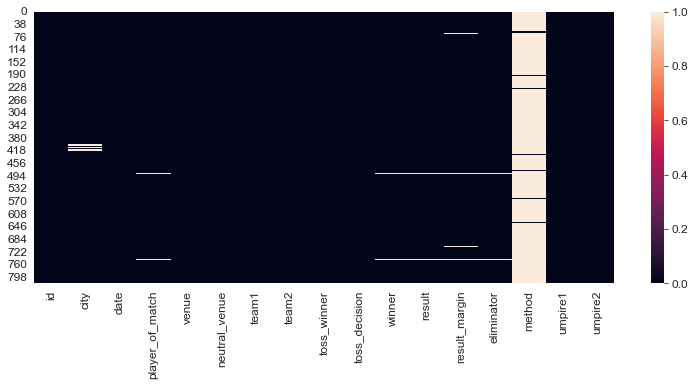

In [6]:
sns.heatmap(matches.isnull())

In [7]:
 matches.isnull().sum()


id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

After inspecting the dataset we found that the columns winner, result, player_of_match has 4 nans. We found that the matches that were tied due to rains have nans in these columns. We can drop the nan rows as it will not affect our analysis.

In [8]:
matches = matches.dropna(subset = ['winner', 'result', 'player_of_match'])
matches.shape

(812, 17)

The column 'method' has the highest number of NaNs in the dataset. The best course of action would probably be to drop the entire column. However, the rows where the 'method' column does have values are those matches where D/L method was used. Let us store it in another DataFrame and drop 'method' from matches.

In [9]:
DL = matches.dropna(subset = ['method'])
matches = matches.drop('method', axis = 1)

In [10]:
DL.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
40,336022,Delhi,2008-05-17,DPMD Jayawardene,Feroz Shah Kotla,0,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,D/L,AV Jayaprakash,RE Koertzen
43,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan
60,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade
63,392186,Durban,2009-04-21,CH Gayle,Kingsmead,1,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,N,D/L,DJ Harper,SD Ranade
89,392214,Centurion,2009-05-07,ML Hayden,SuperSport Park,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,N,D/L,DJ Harper,TH Wijewardene


Matches that were held in Dubai International Stadium had NaNs in their city column.

In [11]:
matches.loc[matches.city.isna(), 'city'] = 'Dubai'

Lets take a look at the 'result_margin' column which has na values.

In [12]:
matches.loc[matches.result_margin.isna()].head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,K Hariharan,DJ Harper
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,Aleem Dar,AK Chaudhary


<AxesSubplot:>

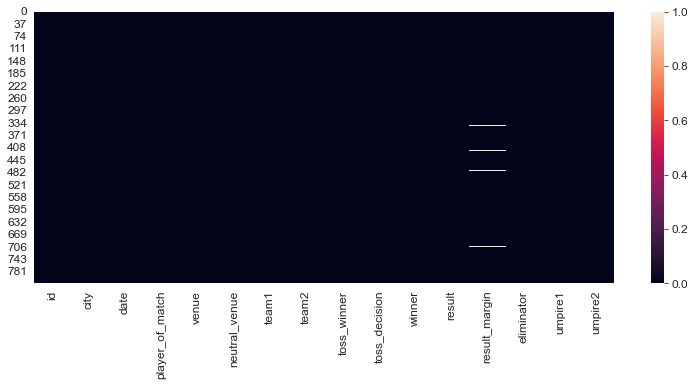

In [13]:
sns.heatmap(matches.isnull())

All the null values are omited


# Exploratory Data Analysis


No of matches played.

In [14]:
matches.shape[0]

812

No of teams participated

In [15]:
matches["team1"].nunique()

15

Name of the teams:

In [16]:
matches["team1"].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

After inspecting the matches dataset, we found that the team 'Pune Warriors' is written as 'Rising Pune Supergiants', Delhi Daredevils and Delhi Capitals are the same team,also Deccan chargers and Sunrisers Hyderabad are the same teams. Lets fix this.

In [17]:
matches.replace('Pune Warriors', 'Rising Pune Supergiant', inplace = True)

In [18]:
matches.replace('Delhi Daredevils', 'Delhi Capitals', inplace = True)


In [19]:
matches.replace('Deccan Chargers', 'Sunrisers Hyderabad', inplace = True)


In [20]:
matches["team1"].nunique()

12

Set year from one column of date in to a new column.

In [21]:
matches['Season'] = pd.DatetimeIndex(matches['date']).year
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008


Total seasons 

In [22]:
matches["Season"].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int64)

In [23]:
matches["Season"].nunique()

13

Season with heighest number of matches

C:\Users\Human\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

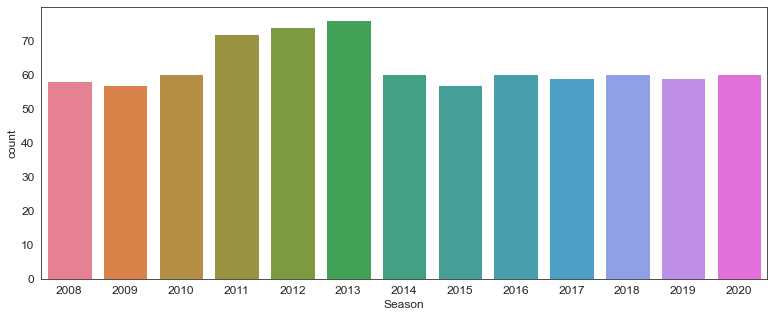

In [24]:
sns.countplot(matches["Season"])

maximum number of matches are played in 2013

**How many matches did the teams played throughout the IPL(2008-2020)?**

In [50]:
# Total matches played by a team
partial_count1 = matches['team1'].value_counts()
partial_count2 = matches['team2'].value_counts()
total_matches = np.add(partial_count1, partial_count2).sort_values(ascending = False)
total_matches.head()

Mumbai Indians                 203
Sunrisers Hyderabad            199
Delhi Capitals                 192
Kolkata Knight Riders          192
Royal Challengers Bangalore    192
dtype: int64

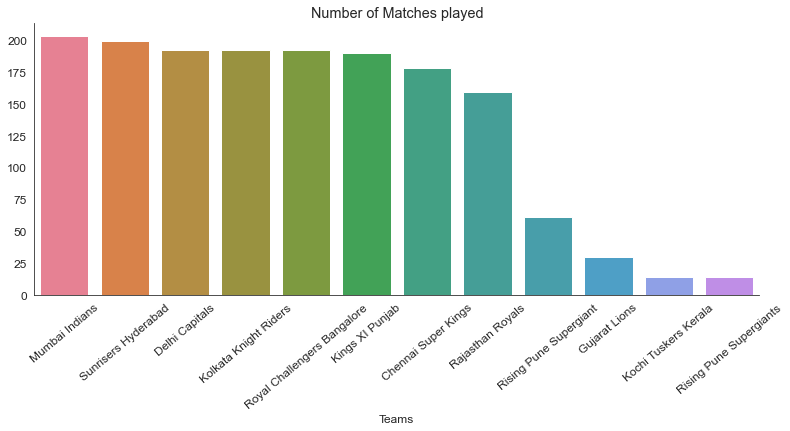

In [51]:
sns.barplot(x = total_matches.index, y = total_matches.values)
sns.despine()
_ = plt.xticks(rotation = 40)
plt.title('Number of Matches played')
_ = plt.xlabel('Teams')

**Which team has the highest win percentage?**

In [59]:
winner_counts = matches['winner'].value_counts()
win_per = np.round(np.divide(winner_counts, total_matches)*100).sort_values(ascending = False)
win_per.head()

Chennai Super Kings      60.0
Mumbai Indians           59.0
Kolkata Knight Riders    52.0
Rajasthan Royals         51.0
Sunrisers Hyderabad      48.0
dtype: float64

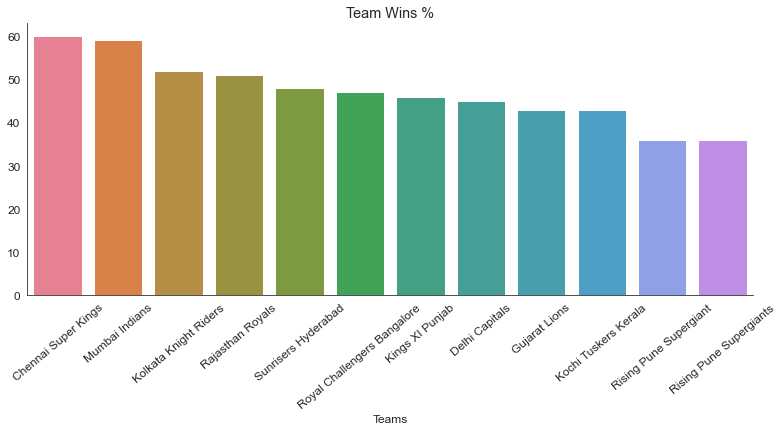

In [60]:
sns.barplot(x = win_per.index, y = win_per.values,)
sns.despine()
_ = plt.xticks(rotation = 40)
plt.title('Team Wins %')
_ = plt.xlabel('Teams')

> *Chennai Super Kings has the highest win percentage of **60%** among the all the teams.*

Most Successful team

In [25]:
matches.winner.value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Sunrisers Hyderabad             95
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Delhi Capitals                  86
Rajasthan Royals                81
Rising Pune Supergiant          22
Gujarat Lions                   13
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

<AxesSubplot:>

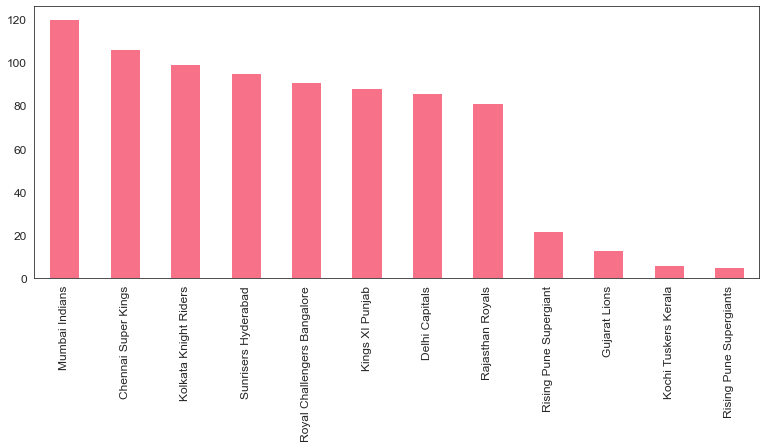

In [26]:
matches.winner.value_counts().plot(kind='bar')

Mumbai Indians is most Successful team in IPL

In [27]:
matches['toss_winner'].value_counts()

Mumbai Indians                 106
Sunrisers Hyderabad            100
Delhi Capitals                  99
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     86
Rajasthan Royals                85
Kings XI Punjab                 85
Rising Pune Supergiant          26
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Name: toss_winner, dtype: int64

<AxesSubplot:>

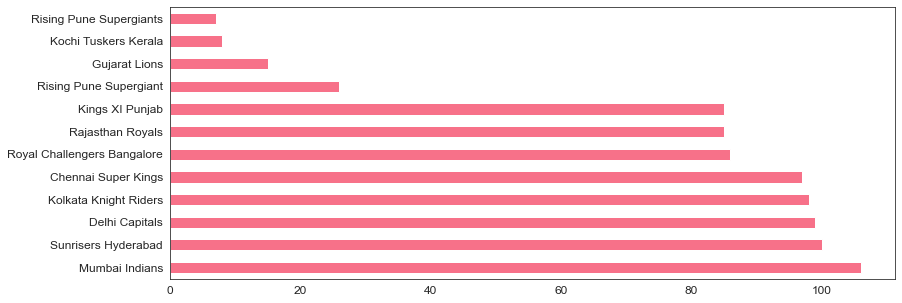

In [28]:
matches['toss_winner'].value_counts().plot(kind='barh')

Mumbai Indians won the maximum number of toss also

In [29]:
matches['player_of_match'].value_counts()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: player_of_match, Length: 233, dtype: int64

<AxesSubplot:>

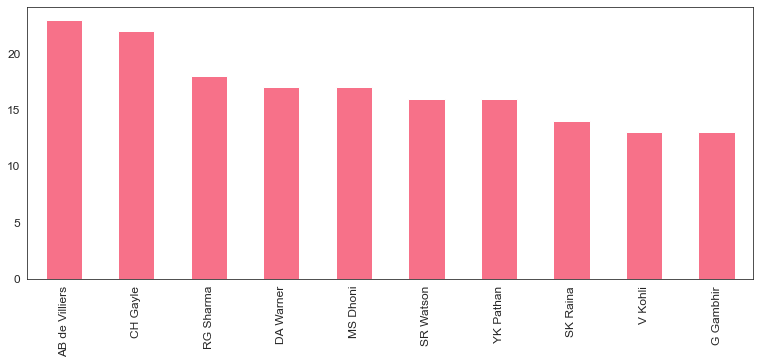

In [30]:
matches['player_of_match'].value_counts().head(10).plot(kind='bar')

ABD,CH Gayle and Rohit sharma are the top 3 players with maximum no of MOM titles

In [31]:
matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Chandigarh         56
Jaipur             47
Dubai              39
Pune               38
Abu Dhabi          29
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Sharjah            12
Centurion          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Cape Town           7
Ranchi              7
Port Elizabeth      7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

<AxesSubplot:>

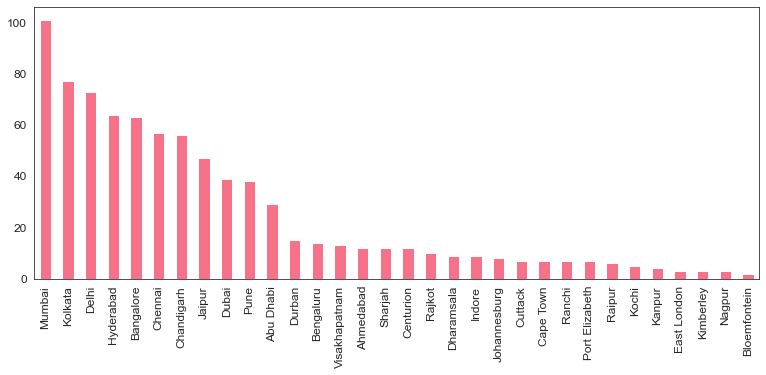

In [32]:
matches['city'].value_counts().plot(kind='bar')

Maximum number of matches are played in Mumbai

I have always wondered whether the teams batting in Inning1 has more advantage over their rival teams.<br> **Which teams are more likely to win ?**

In [65]:
total_runs_inning = ball.groupby(by =['id', 'inning']).agg({'total_runs':'sum'}).reset_index()
winners_ = pd.pivot_table(data = total_runs_inning, columns = 'inning', index = 'id', values = 'total_runs')
winners_['won'] = np.where(winners_[1]>winners_[2], 'Innings 1', 'Innings 2')
winners_['won'] = np.where(winners_[1]==winners_[2], 'draw', winners_['won'])
winners_.head()

inning,1,2,won
id,,,
336010,1.0,NaN,Innings 2
336020,1.0,NaN,Innings 2
392217,NaN,1.0,Innings 2
392218,NaN,1.0,Innings 2
392222,1.0,NaN,Innings 2


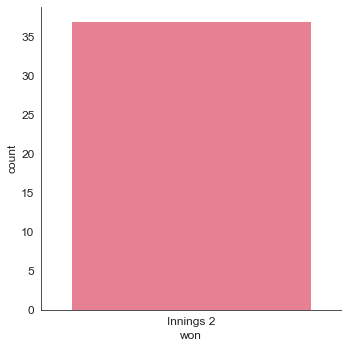

In [66]:
sns.catplot(x="won", kind="count", data=winners_)

Team who bats in second inning wins most of the time